# 核函数

[![SVM5.png](https://i.postimg.cc/TPkSj73k/SVM5.png)](https://postimg.cc/d7y4w9dd)

### 1. 高斯核函数(RBF核)

- K(x, y) 表示 x 和 y 的点乘
$$K(x, y) = e^{-\gamma||x-y||^2}$$
- 高斯函数：
$$g(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$$

- 本质：将每一个样本点映射到一个无穷维的特征空间


**多项式特征**

- 依靠升维使得原本线性不可分的数据线性可分
![](https://i.postimg.cc/nhbc6tDQ/screenshot-8.png)
- 添加第二个特征 $x^2$ 后
![](https://i.postimg.cc/J0HM2T7q/screenshot-9.png)
- 此时变为是线性可分的

**同理，对于高斯核**
![](https://i.postimg.cc/g0cwTPCH/screenshot-10.png)

### 2. 直观理解高斯核函数

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# x 只有一个特征
x = np.arange(-4, 5, 1)
x

array([-4, -3, -2, -1,  0,  1,  2,  3,  4])

In [4]:
# 确定 y，使得 x 不可分
y = np.array((x >= -2) & (x <= 2), dtype='int')
y

array([0, 0, 1, 1, 1, 1, 1, 0, 0])

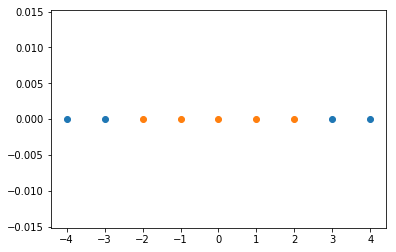

In [6]:
# 对于 y 都取 0
plt.scatter(x[y==0], [0]*len(x[y==0]))
plt.scatter(x[y==1], [0]*len(x[y==1]))

#### 使用高斯核函数使得数据线性可分

In [10]:
# l 是固定的地表
def gaussian(x, l):
    gamma = 1.0
    return np.exp(-gamma * (x - l)**2)

In [11]:
l1, l2 = -1, 1

X_new = np.empty((len(x), 2))
for i, data in enumerate(x):
    X_new[i, 0] = gaussian(data, l1)
    X_new[i, 1] = gaussian(data, l2)    

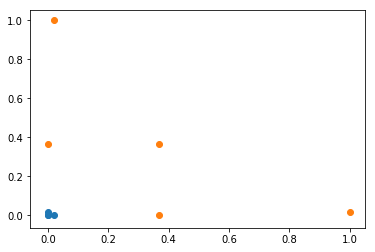

In [12]:
plt.scatter(X_new[y==0, 0], X_new[y==0, 1])
plt.scatter(X_new[y==1, 0], X_new[y==1, 1])

- **此时，可以看出，经过高斯核函数转换后，数据变得可分了**
![](https://i.postimg.cc/x8Zy0d2Q/screenshot-11.png)

### 3. Scikit-Learn 中的核函数

![](https://i.postimg.cc/vH1C5gDW/screenshot-13.png)

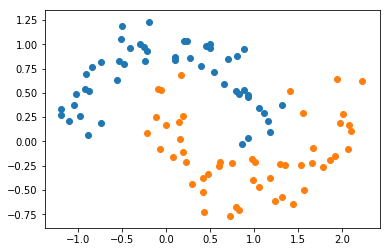

In [15]:
from sklearn import datasets

X, y = datasets.make_moons()
# 为数据添加随机噪音，0.15是标准差
X, y = datasets.make_moons(noise=0.15, random_state=666)

plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

def RBFKernelSVC(gamma = 1.0):
    return Pipeline([
        ('std_scaler', StandardScaler()),
        ('svc', SVC(kernel='rbf', gamma=gamma))
    ])

##### gamma = 1.0

In [18]:
svc = RBFKernelSVC(gamma=1.0)
svc.fit(X, y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

In [19]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0])*100)).reshape(1, -1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2])*100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    
    y_predic = model.predict(X_new)
    zz = y_predic.reshape(x0.shape)
    
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF590', '#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

D:\appCommon\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


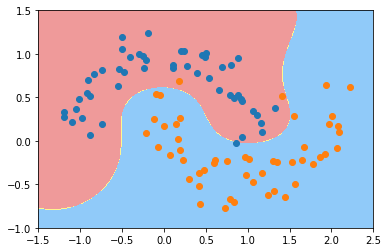

In [20]:
plot_decision_boundary(svc, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

##### gamma = 100

In [21]:
svc_gamma100 = RBFKernelSVC(gamma=100)
svc_gamma100.fit(X, y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

D:\appCommon\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


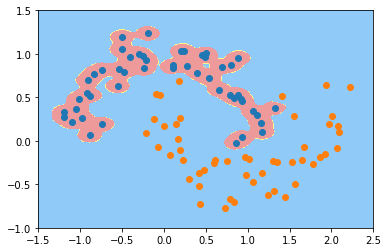

In [22]:
plot_decision_boundary(svc_gamma100, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

- gamma 大， 则图案比较窄， 此时显然过拟合了

##### gamma = 10

In [23]:
svc_gamma10 = RBFKernelSVC(gamma=10)
svc_gamma10.fit(X, y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

D:\appCommon\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


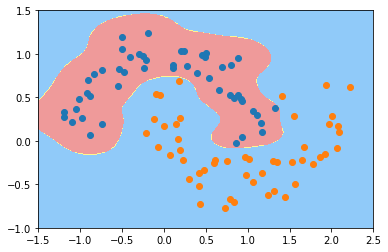

In [24]:
plot_decision_boundary(svc_gamma10, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

##### gamma = 0.1

In [25]:
svc_gamma01 = RBFKernelSVC(gamma=0.1)
svc_gamma01.fit(X, y)

Pipeline(memory=None,
     steps=[('std_scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])

D:\appCommon\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


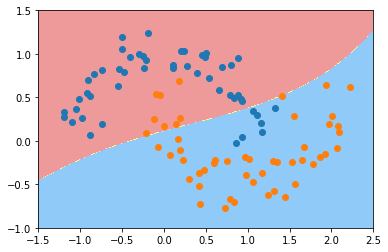

In [26]:
plot_decision_boundary(svc_gamma01, axis=[-1.5, 2.5, -1.0, 1.5])
plt.scatter(X[y==0, 0], X[y==0, 1])
plt.scatter(X[y==1, 0], X[y==1, 1])

- 可以看出，此时 gamma 小，图案比较胖，此时显然欠拟合